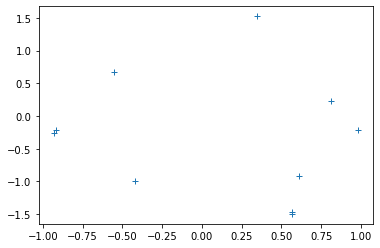

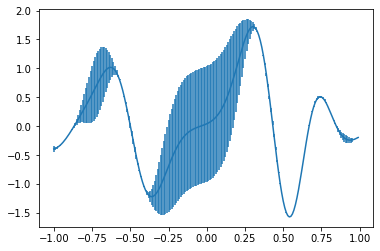

In [1]:
from numpy import *
import pylab

class Kernel(object):
    """
    Kernel from Bishop's Pattern Recognition and Machine Learning pg. 307 Eqn. 6.63.
    """
    def __init__(self,*args):
        self.thetas = args

    def __call__(self,x,y):
        exponential = self.thetas[0] * exp( -0.5 * self.thetas[1] * sum( (x - y)**2 ) )
        linear = self.thetas[3] * dot(x,y)
        constant = self.thetas[2]
        return exponential + constant + linear

class OrnsteinKernel(object):
    """
    Ornstein-Uhlenbeck process kernel.
    """
    def __init__(self,theta):
        self.theta = theta

    def __call__(self,x,y):
        return exp(-self.theta * sum(abs(x-y)))

def covariance(kernel, data):
    return reshape([kernel(x,y) for x in data for y in data], (len(data),len(data)))

def draw_multivariate_gaussian(mean,C):
    ndim = len(mean)
    z = random.standard_normal(ndim)
    # Better numerical stabability than cholskey decomposition for
    # near-singular matrices C.
    [U,S,V] = linalg.svd(C)
    A = U * sqrt(S)

    return mean + dot(A,z)

def train(data,kernel):
    mean = zeros(len(data))
    C = covariance(kernel,data)
    return (mean,C)

def predict(x, data, kernel, C, t):
    """
    The prediction equations are from Bishop pg 308. eqns. 6.66 and 6.67.
    """

    k = [kernel(x,y) for y in data]
    Cinv = linalg.inv(C)
    m = dot(dot(k,Cinv),t)
    sigma = kernel(x,x) - dot(dot(k,Cinv),k)
    return (x,m,sigma)

#kernel = OrnsteinKernel(1.0)
kernel = Kernel(1.0, 64.0, 0.0, 0.0)

# Some sample training points.
xpts = random.rand(10) * 2 - 1

# In the context of Gaussian Processes training means simply
# constructing the kernel (or Gram) matrix.
(m,C) = train(xpts, kernel)

# Now we draw from the distribution to sample from the gaussian prior.
t = draw_multivariate_gaussian(m,C)

pylab.figure(0)
pylab.plot(xpts, t, "+")

# Instead of regressing against some known function, lets just see
# what happens when we predict based on the sampled prior. This seems
# to be what a lot of other demo code does.

# Explore the results of GP regression in the target domain.
predictions = [predict(i,xpts,kernel,C,t) for i in arange(-1,1,0.01)]

pylab.figure(1)
x = [prediction[0] for prediction in predictions]
y = [prediction[1] for prediction in predictions]

sigma = [prediction[2] for prediction in predictions]
pylab.errorbar(x,y,yerr=sigma)

pylab.show()